# Principles of Machine Learning AE1

In [2]:
# Imports the required python libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDRegressor, RidgeCV, Ridge, SGDClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, scale
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC, LinearSVC

## Gradient Descent 

#### 1. What is gradient descent? What are the main parameters used in gradient descent? How can they be used to optimise the gradient descent procedure?

Gradient descent is an optimization method that updates the parameters of a model with respect to the loss function, in order to minimise error in predictions. Via gradient descent the values of the parameters will ideally converge to their optimal values and produce the desired outputs. It travels down the curve of the loss function through iterative steps (determined by the learning rate) until it finds a point in which the gradient is equal or near zero. This point is assumed to be the global minimum of the function, and thus the optimal point to minimise loss/error. This can be written as:

$ \theta_{k+1} = \theta_k - \eta_kg_k$ (Murphy, 2022)

In Layman's terms: imagine you are blindfolded at the top of a valley and wish to find the way down. You can feel how steep the ground is and choose to travel along the steepest downward gradient until you get to a flat point, where you conclude that you must be at the bottom of the valley. This is how gradient descent works. Gradient descent is initialised with a random starting point $\theta$ according to the loss function at randomly initialised model parameters, the gradient of the loss function is then calculated at that point $g_k$. Then, according to the learning rate $\eta_k$, the algorithm takes one step in the descending direction and recalculates the gradient at that point until it converges on a 0 gradient. This point (ideally) should be the global minimum of the function (Geron, 2019). 

The main parameter used in gradient descent is the learning rate which determines the size of each iterative step. If the learning rate is too small, then the algorithm will take an unnecessarily long time to converge or may get stuck in a local minimum (see question 4 for more information). However, if the learning rate is too big then the algorithm can cross the plateau entirely and may never converge or even diverge (getting worse and worse with each step) (Murphy, 2022). Another parameter is the number of training iterations which can help avoid overfitting (Geron, 2019). Moreover, there are numerous implementations of Gradient Descent, such as Batch Gradient Descent, Stochastic Gradient Descent and  Mini-batch Gradient Descent. 

#### 2. What is linear regression? What are the advantages and disadvantages of linear regression?


Linear regression is a supervised machine learning algorithm used to predict outputs from an input feature or set of independent input features (called Multiple Regression) via a linear function. Like all other regression methods it requires the output variable to be continuous. Linear regression calculates the predicted value according to the weighted sum of the input features plus a constant value known as the intercept (Geron, 2019). Essentially, the model draws a straight line to map the relationship between x and y values. 

This can be written as $y(x) = w^Tx + \epsilon$  where $w^Tx$ is the scalar product of the input vector x and the weight vector and $\epsilon$ is the intercept (the error between the predicted and actual value) (Murphy, 2022), or in terms of the univariate case: $mx + c$.

Linear regression is a widely used model for regression tasks (Murphy, 2022) due to its ease of implementation, computational non-complexity and speed in generating predictions (Geron, 2019). Linear regression in its simplest form is intended for modelling linear relationships between a feature or a set of independent features and a dependent output. Because of this, linear regression is one of the computationally simpler statistical models, but is not suitable for all kinds of data. Firstly, linear regression asserts that all features are independent of each other so does not generalise well on data where this is not the case, including models where some variables have a linear relationship to the target variable. Moreover, a lot of data contains features and target variables with non-linear relationships, and thus linear regression would not be appropriate in this case as the model would not fit well to the data. 

Linear regression is a special case of polynomial regression in which the polynomial degree is one. Generalising this to different degree polynomials gives us Polynomial Regression. Overfitting can present a problem for polynomial regressions (see more in Question 7 and 8). Moreover, overfitting of linear models can be further mitigated by constraining the weights of the models. Ridge, Lasso and Elastic Net Regression are examples of models that attempt this (Geron, 2019). 

## Training

For the following tasks, I have chosen to use the 'Medical Costs Personal Datasets' dataset - publically available on Kaggle.com. The dataset can be downloaded here: https://www.kaggle.com/datasets/mirichoi0218/insurance?select=insurance.csv. 

In [2]:
# Uploads the selected file to Google Colab
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (1).csv


#### 3. Choose a dataset from an open-source repository. Write a routine using the SciKit- Learn Python library to ingest the dataset and train a linear regression model using gradient descent

I have used SKLearn to train a Linear Regression model on the Medical Costs dataset. In order to use gradient descent, I have used the SGDRegressor which uses Schotastic Gradient Descent to update the value of the coefficient used in linear regression. The aim of the model is to predict the price of an individual's Medical Insurance (target) based solely on their Body Mass Index (input). 

In [3]:
# Ingests the data
data = 'insurance.csv'
insurance = pd.read_csv(data)

# Shows a snippet of the data
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The dataset contains numerous features that impact the cost of their insurance (stored in the 'charges' column), such as age, sex, BMI, number of children, whether they are a smoker and the region where they live. I have chosen only to look at BMI for the following tasks. I predict that there will be a strong, potentially linear, correlation between an individuals BMI and their insurance charge, where those with higher BMIs are charged more. However, I predict there there may be an increased cost with those whose BMIs are underweight due to the health complications present with extremely low weight, as well as outliers with high BMIs and lost costs due to the inaccuracies associated with BMI in representing healthy body weight, such as musclular figures.



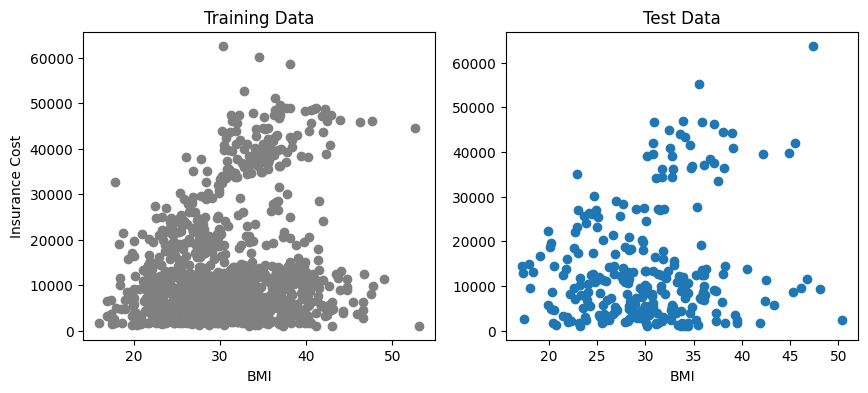

In [4]:
# Assigns the input and target values
input = insurance[['bmi']]
target = insurance['charges']

# Splits the data into train and test sets
train_X, test_X, train_y, test_y = train_test_split(input, 
                                                   target,
                                                   test_size=0.2,
                                                   random_state=123456789)

# Plots the training datapoints and the test datapoints on a graph
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(train_X, train_y, c='grey')
axes[1].scatter(test_X, test_y)
axes[0].set_title("Training Data")
axes[1].set_title("Test Data")
axes[0].set_ylabel('Insurance Cost')
axes[0].set_xlabel('BMI')
axes[1].set_xlabel('BMI')
plt.show()

As we can see from the above graphs, it looks as if a linear or low-order polynomial regression model could fit the data somewhat. However, the data overall is reasonably scattered. Below, I fit SGDRegressor to the data which uses linear regression with Schocastic Gradient Descent.

In [5]:
# Scales the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test_X)

# Creates the SGDRegressor and fits it to the input and target data
# Penalty has been set to none to differentiate from Ridge Regression with SGD
# Shuffle is set to false to ensure that the same results are generated in the following visualisations
linear = SGDRegressor(shuffle=False, penalty=None).fit(X=X_train_scaled, y=train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


#### 4. State and justify the cost function used. What is the difference between a global and local minimum in the cost function? Why is it desirable for these error functions to be convex? Plot the linear regression best fit line through the data set in a graph.

The Mean Square Error for the above model is printed below. 

In [6]:
# Calculates the MSE for the train set and test set
train_linear_mse = mean_squared_error(train_y, linear.predict(X_train_scaled))
linear_mse = mean_squared_error(test_y, linear.predict(X_test_scaled))
print('Train MSE: {} \nTest MSE: {}'. format(train_linear_mse, linear_mse))

Train MSE: 137876007.85737973 
Test MSE: 152524573.98152474


SGD allows for other cost/loss functions, however, the MSE is ideal for Linear Regression as it is a continuous and convex function (Geron, 2019). Hence, there ought to be no worry of the algorithm converging on any local minima over the global minimum. 

With a non-convex loss function, gradient descent can sometimes “get stuck” in local minima. A local minimum is a point on the loss function in which there is some surrounding neighbourhood, within which it is the minimal value (or equivalently gradient is equal to 0 and the second derivatives are positive), but it may not be the minimal value of the loss function over all inputs. 

For example, for more complexly shaped functions (such as the right-hand image pictured below: Genesis, 2018), there may be multiple local minima which are not the global minimum. Since gradient descent travels down the curve until it reaches a point in which the curve is flat it can mistakenly identify these local minima as the optimal value. The global minimum is the overall lowest point in the loss function, and thus the true optimal value for minimising loss. Ideally the error function would be convex since, in that case, there is only one minimum point - thus, any local minima discovered will be the global minimum value. However, this is not often the case so it is important to tune hyperparameters appropriately (such as finding the best learning rate for that function) or using a different version of gradient descent (such as Stochastic over Batch for example)  to reduce the chance of getting “stuck” in a local minimum rather than the global minimum. 


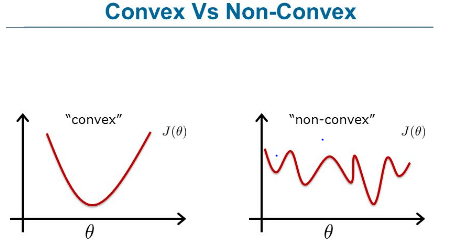

The below graph plots the best line fit onto the data. The train and test data are colour coded.

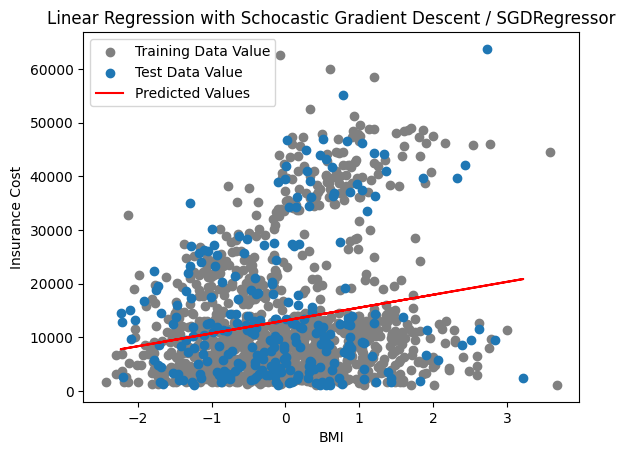

In [7]:
# Predict the outputs from the Test Data
linear_test_predict = linear.predict(X_test_scaled)

# Plots the graph
plt.scatter(X_train_scaled,train_y, c='grey', label='Training Data Value')
plt.scatter(X_test_scaled, test_y, label='Test Data Value')
plt.plot(X_test_scaled, linear_test_predict, c="red", label='Predicted Values')
plt.title('Linear Regression with Schocastic Gradient Descent / SGDRegressor')
plt.xlabel("BMI")
plt.ylabel('Insurance Cost')
plt.legend();

#### 5. Using SciKit-Learn, write a routine to perform batch linear regression. Justify your choice of the number of epochs used in training.

Since Scikit-Learn does not support Linear Regression using Batch Gradient Descent, below I have implemented batch gradient descent for a linear regression manually and plotted the best fit line. 

In [8]:
# Manually initialises the model
m = 0
c = 0
L = 0.0001 
epochs = [100, 1000, 10000, 100000]

best = 0
batch_mse = 100000000000000000

n = len(X_train_scaled.flatten())

# Determines the best number of epochs
for epoch in epochs:
  for _ in range(epoch): 
      Y_pred = m*X_train_scaled.flatten() + c  
      D_m = (-2/n) * sum(X_train_scaled.flatten() * (train_y - Y_pred))  
      D_c = (-2/n) * sum(train_y - Y_pred)  
      m = m - L * D_m 
      c = c - L * D_c 

  # Makes predictions
  train_pred = m*X_train_scaled.flatten() + c
  test_pred = m*X_test_scaled.flatten() + c

  # Checks the MSE and updates if MSE is better than previous 
  mse = mean_squared_error(test_y, test_pred)
  if mse < batch_mse:
    batch_mse = mse
    best = epoch

# Prints the optimal number of epochs
print(best)

100000


I have evaluated the test MSE of batch gradient descent using 100, 1000, 10000 and 100000 epochs. The best test MSE was achieved after 100000. Hence, I have implemented the model below with 100000 epochs and plotted the best fit line on a graph.

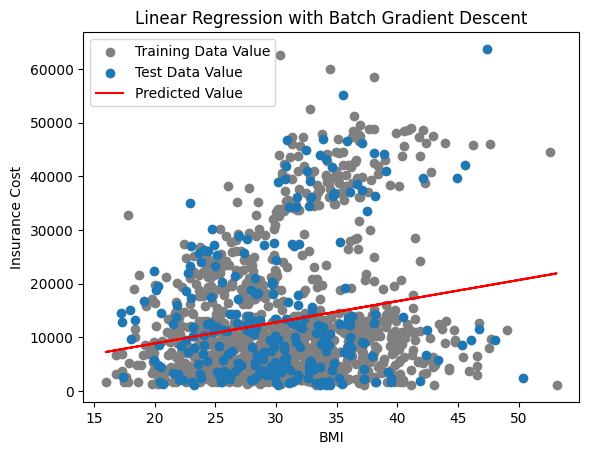

In [9]:
# Manually initialises the model
m = 0
c = 0
L = 0.0001 
epochs = best

# Performs Batch Gradient Descent 
for _ in range(epochs): 
      Y_pred = m*X_train_scaled.flatten() + c  
      D_m = (-2/n) * sum(X_train_scaled.flatten() * (train_y - Y_pred))  
      D_c = (-2/n) * sum(train_y - Y_pred)  
      m = m - L * D_m 
      c = c - L * D_c 

# Plots the best fit line on a graph
plt.scatter(train_X, train_y, color='grey', label='Training Data Value') 
plt.scatter(test_X, test_y, label='Test Data Value') 
plt.plot(train_X, train_pred, color='red', label='Predicted Value')
plt.title('Linear Regression with Batch Gradient Descent')
plt.xlabel("BMI")
plt.ylabel('Insurance Cost')
plt.legend();

The train and test MSE for the model are printed below. In this instance, batch gradient descent appears to be less suitable than schocastic gradient descent for this task.

In [10]:
# Prints the MSE 
train_batch_mse = mean_squared_error(train_y, train_pred)
batch_mse = mean_squared_error(test_y, test_pred)
print('Train MSE: {} \nTest MSE: {}'. format(train_batch_mse, batch_mse))

Train MSE: 137874954.13851678 
Test MSE: 152591943.87232983


#### 6. Using SciKit-Learn, write a routine to use polynomial regression against the same dataset.

In the following cells, I expand SGDRegressor to utilise Polynomial Regression with Schocastic Gradient Descent by transforming the input features. In order to establish the most appropriate degree polynomial to fit to the data I have visualised the MSE for linear, quadratic and cubic regression for both the test and train data. 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


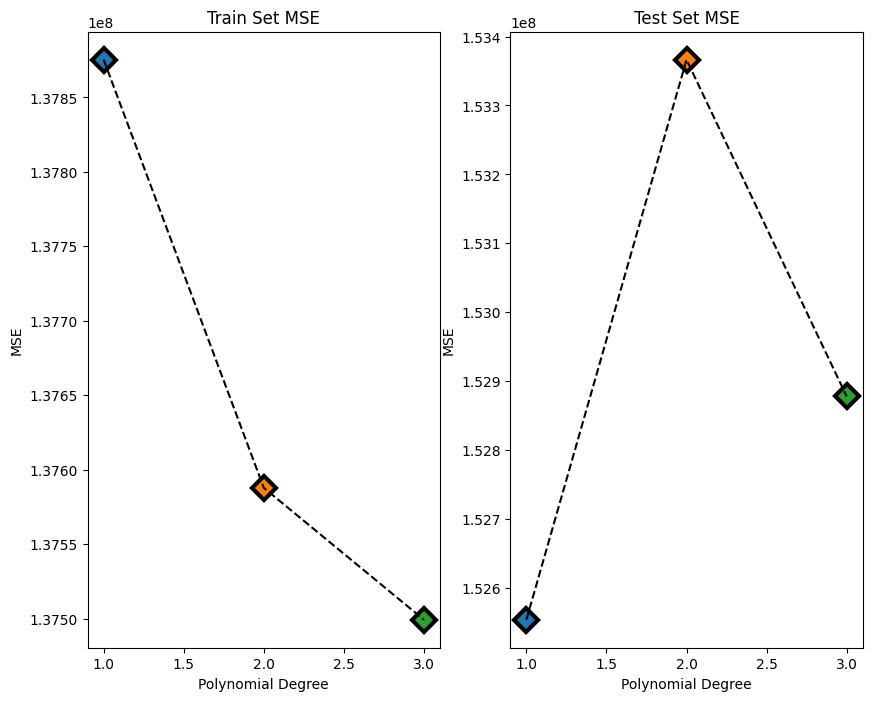

In [11]:
# Sets the polynomial degree to test up to (but not including)
limit = 4

# Creates two subplots
fig, axs = plt.subplots(1, 2, figsize = (10,8))

axs[0].set_title('Train Set MSE')
axs[0].set_xlabel("Polynomial Degree")
axs[0].set_ylabel("MSE")

axs[1].set_title('Test Set MSE')
axs[1].set_xlabel("Polynomial Degree")
axs[1].set_ylabel("MSE")

# Creates empty lists to store the MSEs in
train_mse = []
test_mse = []

# Calculates the train and test MSE for each degree polynomial
for n in range(1, limit): 
  # Transforms the input features to the specified polynomial
  poly = PolynomialFeatures(degree=n, include_bias=False)
  poly_features_train = poly.fit_transform(X_train_scaled)
  poly_features_test = poly.fit_transform(X_test_scaled)
  # Fits SGDRegression onto the transformed features
  poly_regressor = SGDRegressor(shuffle=False, penalty=None, max_iter=10000).fit(poly_features_train, train_y)
  # Makes predictions
  train_y_predict = poly_regressor.predict(poly_features_train)
  test_y_predict = poly_regressor.predict(poly_features_test)
  # Calculates the MSE and adds to the appropriate list
  iter_train_mse = mean_squared_error(train_y_predict, train_y)
  iter_test_mse = mean_squared_error(test_y_predict, test_y)
  train_mse.append(iter_train_mse)
  test_mse.append(iter_test_mse)

  # Plots the train MSE on a graph
  axs[0].plot(n,
              iter_train_mse,
              label = "deg: {}".format(n),
              marker = 'D',
              markersize = 12,
              markeredgecolor = 'black',
              markeredgewidth = 3)
  
  # Plots the test MSE on a graph
  axs[1].plot(n,
              iter_test_mse,
              label = "deg: {}".format(n),
              marker = 'D',
              markersize = 12,
              markeredgecolor = 'black',
              markeredgewidth = 3)
  
# Connects the points with a dashed line
axs[0].plot(range(1,limit), train_mse, 'k--')
axs[1].plot(range(1,limit), test_mse, 'k--')

As we can see from the above visualisations, the non-linear polynomial with the lowest MSE on the training and test sets is the third-degree polynomial. Hence, below I train a third-degree polynomial regression model with SGDRegressor and plot the line of best fit on a graph.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


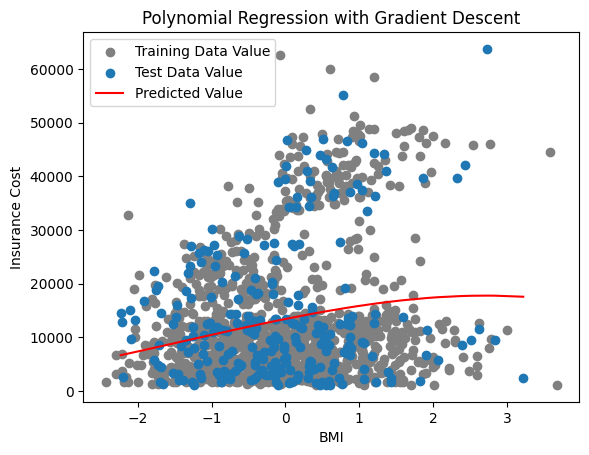

In [12]:
# Sorts the input data
sorted_idx = X_test_scaled.flatten().argsort()

# Transforms the input features according to 3rd degree polynomial
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features_train = poly.fit_transform(X_train_scaled)
poly_features_test = poly.fit_transform(X_test_scaled)
# Trains the polynomial regression model
cubic = SGDRegressor(shuffle=False, penalty=None).fit(poly_features_train, train_y)
poly_train_predict = cubic.predict(poly_features_train)
poly_test_predict = cubic.predict(poly_features_test)

# Plots the polynomial graph
plt.scatter(X_train_scaled,train_y, c='grey', label='Training Data Value')
plt.scatter(X_test_scaled, test_y, label='Test Data Value')
plt.plot(X_test_scaled.flatten()[sorted_idx], poly_test_predict[sorted_idx], c="red", label='Predicted Value')
plt.title('Polynomial Regression with Gradient Descent')
plt.xlabel("BMI")
plt.ylabel('Insurance Cost')
plt.legend();

This appears to also fit the data well. The MSE for both the test and train data is printed below. However, the model still falls short of the previous linear methods. 

In [13]:
# Calculates the MSE
train_cubic_mse = mean_squared_error(train_y, poly_train_predict)
cubic_mse = mean_squared_error(test_y, poly_test_predict)
print('Train MSE: {} \nTest MSE: {}'. format(train_cubic_mse, cubic_mse))

Train MSE: 137552369.74006668 
Test MSE: 152860700.76229215


#### 7. Explain the circumstances under which you use linear, or polynomial, or batch regression.

As previously stated in Question 2, Linear Regression asserts that the relationship between the features and the target can be modelled by a linear function $f(x) = mx + c$. However, a linear function is not always enough to accurately represent the relationship between x and y. Using a linear regression model when a polynomial regression model would be more appropriate (as seen above) could result in underfitting the data. The linear regression model can, however, be generalised to polynomial regression in order to fit nonlinear data by replacing $f$ with a non-linear function (Murphy, 2022). However, high-order polynomial regressions can easily overfit the training data - resulting in a very “wiggly” function (Murphy, 2022). High-order polynomial regressions struggle especially with noisy data as any noise or anomalies will be fitted, perhaps even exactly, by the curve. Thus, it is important to constraint the polynomial somewhat to a lower-order polynomial to ensure low error can be carried over to test data.  

When considering the choice between Linear and Polynomial Regression it is important to consider the MSE for each model to see which best fits the data. Consider, the previous graph detailing the MSE for different polynomial degrees, 1 (linear), 2 and 3, which showed that in our case, Linear Regression was the best overall fit for the data as it had the lowest MSE on the unseen subset of the data.

In [15]:
# Prints the MSEs for each model thus far
print(f'Linear SGD MSE on Test Data : {linear_mse}')
print(f'Cubic SGD MSE on Test Data  : {cubic_mse}')
print(f'Batch MSE on Test Data      : {batch_mse}')

Linear SGD MSE on Test Data : 152524573.98152474
Cubic SGD MSE on Test Data  : 152860700.76229215
Batch MSE on Test Data      : 152591943.87232983


Batch Regression can be compared to Stochastic Regression. The SGD Regressor utilises Stochastic Gradient Descent for optimisation. Batch Gradient Descent is the default version and involves updating the model after an epoch, Stochastic Gradient Descent updates the model after each iteration, and mini-batch gradient descent - a combination of the two approaches - splits the data into batches and updates the model after each batch rather than each iteration. Stochastic Gradient Descent only uses one example in each iteration and shuffles the data each time (although in order to compare MSE for different models I have set `Shuffle=False` in this case). 

 When performing Batch Gradient Descent the whole training set is used which can mean that the algorithm is slow in calculating the gradients, especially if the dataset is very large. Stochastic gradient descent, on the other hand, is much faster as it only calculates the gradient for one example, picking a random point with each iteration, making Stochastic Gradient generally better suited to larger datasets. This can be less taxing in terms of time and memory, but can sometimes be computationally expensive due to the frequent updates after each epoch (Geron, 2019). Stochastic Gradient descent is also helpful when dealing with complex loss functions, as its random nature reduces the chance of getting stuck in a local minima (Geron, 2019).

 In this instance we are working with a small dataset that does not have a complex loss function. Despite this, SGDRegressor appears to marginally outperform Batch Regression.

#### 8. Explain what is meant by the Bias and Variance trade-off both in general, and with reference to the dataset you are analysing.

A model with high-bias is likely not to generalise well, and will often underfit the training data due to incorrect assumptions made in the model design stage. Variance, on the other hand, is the sensitivity a model has to minor differences in the training data, including noise or anomalies, and causes the model to overfit the training data - likewise causing poor generalisation. 

For example, using a simple linear regression may have high bias as it may not be flexible enough to capture the full nuance in the training data, resulting in underfitting and poor accuracy. However, if instead we use a high-degree polynomial or decision tree to map the relationship between the input and target variables in the training data which allow for more flexibility, it is possible for the model to map the data almost exactly - resulting in high variance, overfitting of the training data and also have poor accuracy. In this case, the model is learning that specific split of training data and would not perform well on a different split or unseen real-world data. The aim is to train a model that approximates the relationship between the inputs and target in a way that can be generalised beyond the training data. 

Thus, it is important to balance bias and variance so that the model has just the right amount of specificity that it can generalise well to unseen data. The model needs to have not so much bias that it is underfitting the data, but not so much variance that it is overfitted. This is regarded as the bias-variance tradeoff (Geron, 2019). 

For example, remember the visualisation of the MSE for different polynomial degrees. We can see that a third-degree polynomial fits the training data best, but is not the best fit for the test data (although the difference is relatively small). The same can be said for the second-degree polynomial. Whilst Linear Regression does not fit the training data as well as second and third-degree Polynomial Regression, it overall generalises better on unseen data and thus has the lowest MSE of the three models.

#### 9. Explain two further regression methods. When would you use them? What are their advantages? Use these two additional regression methods against the dataset you have chosen. Document the results. Compare the new results with those generated by the original gradient descent method you used.

Ridge Regression is a version of Linear Regression (and can be expanded to include Polynomial Regression) in which a *regularisation term* is added to the cost function (Geron, 2019).  This is the case for both Ridge and Lasso regression and was designed to constraint the weights of the model in order to avoid overfitting. For Ridge Regression the regularisation term is:

$\sum_{i=1}^{n} \theta_i^2$

This is added to the cost function during training and forces the model to have lower weight values (Geron, 2019). 

An important parameter in Ridge Regression is the alpha value (α) which determines to what extent the model is regularised. The higher the value of α the less extreme the predictions will be and predictions will tend more towards the mean. Lower alpha values, on the other hand, will result in a model with higher variance. Our current model does not seem to have an issue with overfitting, even with higher degree polynomials, and performs well with a flat linear model so I do not expect Ridge Regression to bring about substantial improvements.

The below visualisation shows the change in the weight values/coefficients for different alpha values. 

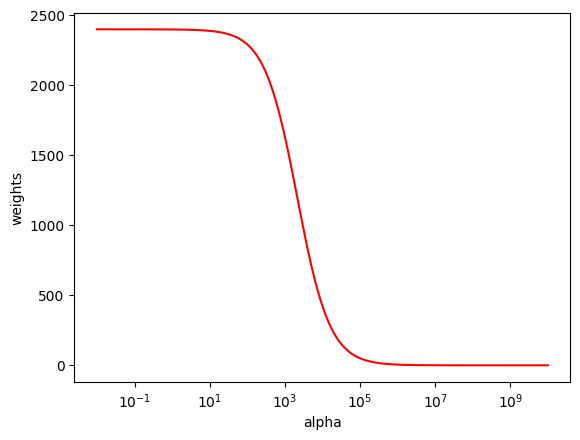

In [14]:
# Creates a range of alpha values
alphas = 10**np.linspace(10,-2,100)*0.5

# Creates the Ridge Regression object
ridge = Ridge()

coefs = []

# Determines the coefficient for each alpha value
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train_scaled, train_y)
    coefs.append(ridge.coef_)

# Plots the relationship between the alpha value and the coef    
ax = plt.gca()
ax.plot(alphas*2, coefs, c='red')
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights');

In order to determine the best alpha value I have used cross-validation. I have then initialised a Ridge Regressor with the optimal alpha value, fitted it to the scaled data and calculated its test and train MSE.

In [37]:
# Creates lists to store the MSEs of different models to be used later for comparisons
new_train_mse = [train_mse[0], train_batch_mse, train_mse[2]]
new_test_mse = [test_mse[0], batch_mse, test_mse[2]]
names = ['Linear (SGD)', 'Batch Regresson', 'Third Degree Polynomial (SGD)']

In [38]:
# Uses cross-validation to find the best hyper-parameters for Ridge Regressor.
ridgecv = RidgeCV(alphas = alphas)
ridgecv.fit(X_train_scaled, train_y)
print(f'The best alpha value is {ridgecv.alpha_}')

# Instantiates Ridge and fits it to the input and target data
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_train_scaled, train_y)

# Makes predictions and calculates train and test MSE
ridge_train_predict = ridge.predict(X_train_scaled)
ridge_mse_train = mean_squared_error(train_y, ridge_train_predict)

ridge_test_predict = ridge.predict(X_test_scaled)
ridge_mse_test = mean_squared_error(test_y, ridge_test_predict)
print(ridge_mse_test)

The best alpha value is 28.611838296751102
152592423.65588737


The best alpha value and the MSE on the test set is printed above.

Schocastic Gradient Descent can also be applied to Ridge Regression through the penalty hyperparameter of SGDRegressor. Since 'l2' penalty, which denotes Ridge Regression, is the default value this does not need to be specified.

In [39]:
# Instantiates Ridge and fits it to the input and target data
sgdridge = SGDRegressor(alpha=ridgecv.alpha_)
sgdridge.fit(X_train_scaled, train_y)

# Makes predictions and prints the train and test MSE
sgdridge_train_predict = ridge.predict(X_train_scaled)
sgdridge_mse_train = mean_squared_error(train_y, sgdridge_train_predict)

sgdridge_test_predict = ridge.predict(X_test_scaled)
sgdridge_mse_test = mean_squared_error(test_y, sgdridge_test_predict)
print(sgdridge_mse_test)

# Add the MSE values to a list for later graph
new_test_mse.append(sgdridge_mse_test)
new_train_mse.append(sgdridge_mse_train)
names.append('Ridge Regression (SGD)')

152592423.65588737


Another regression model is Linear Regression with Multiple Features (Multi-linear Regression).

Below, I use all of the numerical data in the 'insurance.csv' dataset to train a SGDRegressor model. Whilst both Linear and Polynomial Regression can be expanded to include multiple input features, I do not use Polynomial Features in this case since Linear model has performed best thus far. However, evaluating the effectiveness of Polynomial SGDRegression with multiple features could be something that could be explored in future work. The MSE for this model is printed at the bottom of the cell and shows a marked improvement to previously used models. (Of course, this is likely due to the increase in explained variance with the addition of extra features, since the correlation between the previous single input and target was fairly low.)

In [40]:
# Selects the columns with numerical data from the dataset
inputs = insurance[['age', 'bmi', 'children']]

# Splits the new data into train and test sets
multi_train_X, multi_test_X, multi_train_y, multi_test_y = train_test_split(inputs, 
                                                                            target,
                                                                            test_size=0.2,
                                                                            random_state=123456789)

# Scales the data
scaler = StandardScaler()
Xs_train_scaled = scaler.fit_transform(multi_train_X)
Xs_test_scaled = scaler.transform(multi_test_X)

# Creates the Multi-SGDRegressor and fits it to the input and target data
multi_linear = SGDRegressor(shuffle=False, penalty=None).fit(X=Xs_train_scaled, y=train_y)

# Makes predictions and calculates MSE
multi_train_predict = multi_linear.predict(Xs_train_scaled)
multi_mse_train = mean_squared_error(multi_train_y, multi_train_predict)

multi_test_predict = multi_linear.predict(Xs_test_scaled)
multi_mse_test = mean_squared_error(multi_test_y, multi_test_predict)
print(multi_mse_test)

# Adds MSE values to list
new_train_mse.append(multi_mse_train)
new_test_mse.append(multi_mse_test)
names.append('Multi-Linear Regression (SGD)')

137979810.4453176


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


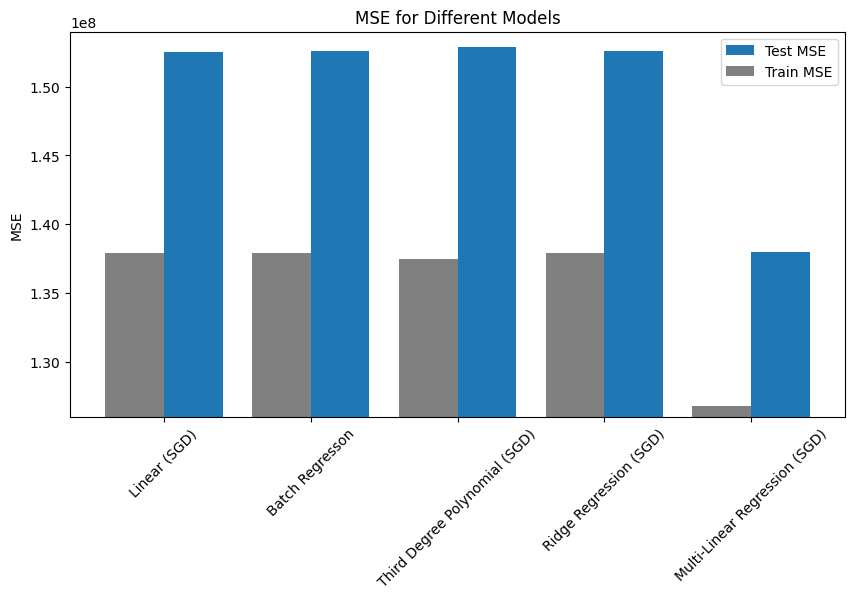

In [41]:
# Plots the MSE for each model
plt.figure(figsize=(10,5))

plt.title('MSE for Different Models')
# In order to group together the results by classifier, we have to manually specify the locations on the x-axis and then override the x-labels
X_axis = np.arange(len(new_test_mse))
# Select and plot thetwo types of vectorizer separately with appropriate x offset.
plt.bar(X_axis + 0.2, new_test_mse, width =  0.4, label='Test MSE')
plt.bar(X_axis - 0.2, new_train_mse, width =  0.4, color='grey', label='Train MSE')
# Override x-labels
plt.xticks(X_axis, names, rotation=45)
plt.ylabel('MSE')
plt.ylim([1.26e8, 1.54e8])
plt.legend();

In sum, the above visualisation depicts the MSE for each model for both the training and and test subsets of the data. Using only BMI as input to our model, Linear SGDRegressor performs the best with a test-set MSE of:

In [42]:
# Prints the lowest test MSE using a single feature
print(min(new_test_mse[:-1]))

152553785.49200884


However, the best performing model is Multi-Linear SGDRegressor which utilises BMI, age and number of children to make predictions. This has the lowest test MSE of all the models at:

In [43]:
# Prints overall lowest test MSE
print(min(new_test_mse))

137979810.4453176


Overall, the data is best suited to a Multiple Linear Regression model using Schocastic Gradient Descent. 

#### 10. Explain what is meant by a decision boundary in general? Indicate in the example dataset you have used above where is the decision boundary.

In general, a decision boundary refers to the line or surface that separates different classes or categories in the feature space of a classification problem. It represents the region in the vector space where the model makes a decision about which class a particular instance belongs to - whichever zone the feature vector is placed in will determine its class. The decision boundary is determined by the learned parameters or coefficients of the model, for example by an SVM, and represents the division between classes. 

Decision boundaries do not need to be linear. Some data is not linearly seperable, ie. cannot be divided according to a decision boundary with a zero or near-zero error rate on the training set (Murphy, 2022). In this case we use polynomial decision boundaries for example. 

Decision boundaries can be used with Logistic or Softmax Regression (Geron, 2019), a probablistic classification algorithm. However, in the context of regression problems, such as predicting insurance costs, a decision boundary is not commonly used. Instead the model makes predicitions using the Regression line/curve which most fits the data points - as seen in our above visualisations. In the context of our data, we could for example have a decision boundary if we were classifying the sex, smoker, or region features.

## Support Vector Machines

#### 11. What are support vector machines? Under what circumstances would you use them? What are the characteristics of the problems that SVMs are best suited to? What do we mean by margin classification?

The margin is the distance from the decision boundary to the closest data-point (or support vector). The smaller the margin, the less robust the classifier is to small pertubations in the data (e.g. from noise or generalisation to unseen data) since a small change in the data is more likely to change the classification. So, ideally when creating the decision boundary, the margin of the classifier ought to be as large as possible. Support Vector Machines aim to produce the optimal decision boundary in order to seperate the feature vectors by a hyperplane (decision boundary), and use these two regions as the classification. It is a type of supervised machine learning model which is useful for both linear and non-linear data as well as regression and classification tasks (Geron, 2019). 

The hyperplane of a classification model equates to $w^Tx + b$. SVMs perform classification by determining the appropriate $w$ (weights) and $b$ (intercept) values such that the model minimises classification error over the training data whilst maximising the margin (Murphy, 2022). Only the datapoints closest to the decision boundary, called the Support Vectors, are used to calculate the largest margin and the optimal hyperplane boundaries. 

The cost function consists of two parts: the classification error (described above) and a regularisation term. The regularisation term is what maximises the margin of the classifier. The regularisation term is derived by observing that we can minimise the effect that a small pertubance in the data has on the classification by minimising $|w|$ (since it is multiplied by the input data $x$). We then also have a term ($C$) which describes how much we value regularisation versus classification error. Our overall cost function is thus $min_w(|w| + CL_w(X))$, where $L_w$ is the classification with weights $|w|$ over the whole dataset $X$. (Murphy, 2022) 

Basic SVMs perform binary linear classification and require data to be linearly seperable (be able to fully seperated by a straight line) to make accurate predictions. However, SVMs can be utilised on non-linear (but separable) data by applying a transformation to the kernal function (Murphy, 2022). Where the feature vectors cannot be seperated by a linear-decision boundary, it is possible to calculate a transformation of the feature space where the features are linearly seperable before applying the SVM Classifier. This can be done by performing 'the kernal trick' and replacing the dot product (our distance metric) with the kernal function (Murphy, 2022). The kernal function, for example, linear, polynomial, rbf, will determine how the feature space is transformed as it maps the data-points to a new space in which they can be considered linearly seperable. Hence, different kernal functions may be suitable for different data. 

Support Vector Machines are well-suited to a wide range of machine learning tasks, but are most highly suitable to binary classification (although they can be extended to multi-class problems) (Murphy, 2022). However, the accuracy of the model determines on using the most-appropriate kernal function for the data and highly distributed data may require a highly complex kernal function or the best kernal function may be difficult to establish. Support Vector Machines are not very suitable if the data is not seperable. SVMs benefit from only depending on a subset of the training data (the Support Vectors) to establish the optimal decision boundaries via maximising the margin (Murphy, 2022). They scale well to high dimensional data and are also relatively straightforward to train and optimise (through adjusting the C parameter). SVMs also allow for a range of inputs such as strings or trees as well as traditional feature vectors.

#### 12. Write a routine using SciKit- Learn to load a dataset and use a SVM to make classification predictions using support vector machines.

For the following tasks, I have chosen to use the 'Heart Failure Prediction' dataset - publically available on Kaggle.com. The dataset can be downloaded here: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction.

In [44]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (2).csv


The `heart.csv` dataset is a dataset for binary classification tasks which has 11 columns containing information about features relating to Heart Disease and a final `HeartDisease` column in which the feature set is assigned a class 0 or 1. The dataset is split reasonably equally, with 508 patients presenting with Heart Disease and the other 410 not. The dataset can be used to classify patients into two classes - with Heart Disease and without. This can then be used to predict the presence of Heart Disease in unseen patients. 

I begin by loading the dataset and splitting it into train and test subsets, using Age and MaxHR as my inputs. I then train a linear Support Vector Machine using the SVC class for classification.

In [3]:
# Loads the dataset
svm_file = 'heart.csv'
svm_data = pd.read_csv(svm_file)
svm_data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Prints the split of the data
print(f"1: {svm_data['HeartDisease'].sum()}, 0: {(svm_data['HeartDisease']==0).sum()}")

1: 508, 0: 410


In [16]:
# Splits the data into train and test sets 
train_X, test_X, train_y, test_y = train_test_split(svm_data[['Age', 'MaxHR']], 
                                                   svm_data['HeartDisease'],
                                                   test_size=0.25,
                                                   random_state=123456789)

# Instantiates and fits the SVC to the data
# C is set to 10 to harden the margin at this stage, as soft margin classification is performed later
svm = SVC(kernel='linear', C=10)
svm.fit(train_X, train_y)

SVC(C=10, kernel='linear')

#### 13. Comment on the predictions that the SVM has made with specific reference to accuracy and robustness to noise in data of the prediction.

In general, the basic SVM model used above is relatively senstive to noise and outliers in the data. This is because the SVM can struggle to place the decision boundary if attempting to seperate the data via a hard margin. 

Our basic model achieves 68.9% classification accuracy on the train data and 67.83% in the test dataset. The lack of training accuracy suggests that the data is likely not linearly seperable without any further transformation. In the following question, I take a look at the data and map the vector space in order to visualise the decision boundary.

In [17]:
train_pred_y = svm.predict(train_X)
test_pred_y = svm.predict(test_X)

train_accuracy = (train_pred_y == train_y).sum() / train_X.shape[0]
test_accuracy = (test_pred_y == test_y).sum() / test_X.shape[0]

print(f"{train_accuracy=:.2%}")
print(f"{test_accuracy=:.2%}")

train_accuracy=68.90%
test_accuracy=67.83%


#### 14. Modify your code to use SciKit-Learn to include polynomial regression, standard scalars, and a linear SVC. Provide graphs that show the results that these new methods produce.

In [6]:
# Function to create a plot of the feature space to be used later
def plot_classifier(clf, ax, X, Y):
  cmap = 'bwr'

  # Deicision boundary
  # Based on https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html
  x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
  y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                      np.arange(y_min, y_max, 0.02))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.4)

  # Plot data
  ax.scatter(
      X[:,0],
      X[:,1],
      c=Y,
      cmap=cmap,
  );

I have instantiated a new SVC model using scaled data to insure optimal performance. 

In [18]:
# Scales the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test_X)

In [19]:
# Instanstiates the linear SVM
svm = SVC(kernel='linear', C=10)
svm.fit(X_train_scaled, train_y)

SVC(C=10, kernel='linear')

In the below figure we can see the predicted decision boundary. All data-points in the blue region are to be classified as 1 and those that are placed in the red region are classified as 0. The regions are seperated by a decision boundary that is displayed as a red line. It appears that the data is well-distributed and not linearly seperable by using a linear SVM - contributing to the generally low accuracy of the model.

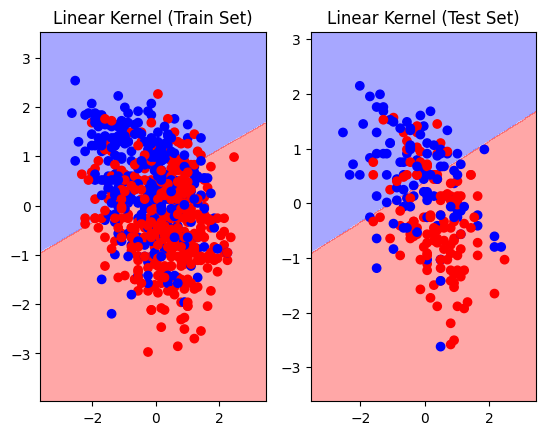

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Linear Kernel (Train Set)')
plot_classifier(svm, ax1, X_train_scaled, train_y)
ax2.set_title('Linear Kernel (Test Set)')
plot_classifier(svm, ax2, X_test_scaled, test_y)

#### 15. Modify your code to use SciKit-Learn to include the Gaussian RBF kernel to model your data. Implement this in SciKit-Learn against your chosen dataset. Explain what benefits your Guassian RBF kernel has generated, and why you chose the values for the hyper-parameters to optimise the effectiveness of the Gaussian RBF.

Next I will implement SVM with an Gaussian Radial Basis Function "RBF" kernel. Using a gaussian RBF kernel transforms the feature space according to a gaussian bell-like distribution. The width of the bell curve is regulated through changing the gamma value. The RBF is the default kernel for SVC and is highly popular due to its versality and flexible nature (Geron, 2019). Furthermore, RBF Kernel SVMs are more space efficient since they utilise the whole dataset during training, only the Support Vectors (Sreenivasa, 2020)

In order to implement this, I use a grid-search to determine the best hyperparameters for my model, and then train the model using the optimal hyperparamers provided by the grid search. Finally, I have plotted the feature space below.

In [61]:
# Hyperparameter tuning for RBF SVC
param_grid = {
    'C': [10],                                # For a harder margin
    'gamma': ['scale', 1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}
rbf_grid = GridSearchCV(SVC(), param_grid, refit=True)
rbf_grid.fit(X_train_scaled, train_y)
print(rbf_grid.best_estimator_)

# Instanstiates the Gaussian SVM
svmgaussian = rbf_grid.best_estimator_
svmgaussian.fit(X_train_scaled, train_y)

SVC(C=10, gamma=1)


SVC(C=10, gamma=1)

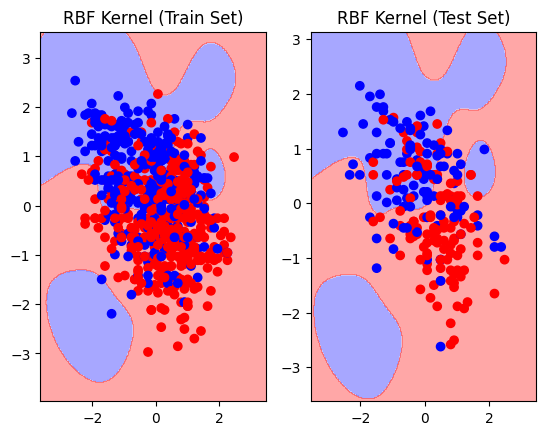

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plot_classifier(svmgaussian, ax1, X_train_scaled, train_y)
ax1.set_title('RBF Kernel (Train Set)')
plot_classifier(svmgaussian, ax2, X_test_scaled, test_y)
ax2.set_title('RBF Kernel (Test Set)');

In [60]:
train_pred_y = svmgaussian.predict(X_train_scaled)
test_pred_y = svmgaussian.predict(X_test_scaled)

train_accuracy = (train_pred_y == train_y).sum() / X_train_scaled.shape[0]
test_accuracy = (test_pred_y == test_y).sum() / X_test_scaled.shape[0]

print(f"{train_accuracy = :.2%}")
print(f"{test_accuracy = :.2%}")

train_accuracy = 73.84%
test_accuracy = 66.09%


Using the RBF kernel results in a lower accuracy on the test data than the linear model. This could be due to overfitting due to the Gaussian model's higher variance which can be seen by the significant different in train and test accuracy. This potentially could be improved by lowering the C value to reduce the soften the margin as well as further tuning the gamma value.  

#### 16. Use three further kernel methods to perform the analysis in step 5.Compare the results. Suggest ideas for improving the kernels you have used.

I further analyse three more kernel methods, Sigmoid, Polynomial and a custom kernel. I have determined the hyperparameters (including the polynomial degree) for both the Sigmoid and Polynomial models using a grid search with cross-validation and demonstrate how to implement a custom kernel using random values. 

Like RBF, adding a polynomial can be helpful to increase flexibily of the model. The higher the degree of the polynomial  the more it will transform the feature space. This works well with highly distributed or complex data (Geron, 2019). The `coef0` hyperparameter determines how much value is placed on higher-degree polynomials. Sigmoid kernel is a lesser used kernel thats origin stems from neural network based classifiers. Finally, it is possible to create a custom kernel via a Gram matrix which allows for a bespoke transformation of the data. 

In [21]:
# Hyperparameter tuning for Polynomial SVC
param_grid = {
    'C': [10],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001],
    'coef0': [0, 1],
    'kernel': ['poly'],
    'degree': [2, 3, 4, 5, 6]
}
poly_grid = GridSearchCV(SVC(), param_grid, refit=True)
poly_grid.fit(X_train_scaled, train_y)
print(poly_grid.best_estimator_)

# Hyperparameter tuning for Sigmoid SVC
param_grid = {
    'C': [10],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001],
    'kernel': ['sigmoid']
}
sig_grid = GridSearchCV(SVC(), param_grid, refit=True)
sig_grid.fit(X_train_scaled, train_y)
print(sig_grid.best_estimator_)

SVC(C=10, coef0=1, degree=5, kernel='poly')
SVC(C=10, gamma=0.001, kernel='sigmoid')


I have defined my custom kernel via a Gram matrix (i.e. a linear transformation) using arbritary values, for demonstration purposes. To further improve this more relevant values should be chosen. 

In [22]:
def custom_kernel(X, Y):
    M = np.array([[2, 4], [5, 1]])
    return X @ M @ Y.T

Below I have plotted the vector space for the three further kernel methods. 

Train accuracy for SVC(C=10, coef0=1, degree=5, kernel='poly'): 71.95%
Train accuracy for SVC(C=10, coef0=1, degree=5, kernel='poly'): 66.96%

Train accuracy for SVC(C=10, gamma=0.001, kernel='sigmoid'): 69.62%
Train accuracy for SVC(C=10, gamma=0.001, kernel='sigmoid'): 66.52%

Train accuracy for SVC(kernel=<function custom_kernel at 0x7efe631c1bd0>): 34.74%
Train accuracy for SVC(kernel=<function custom_kernel at 0x7efe631c1bd0>): 30.43%



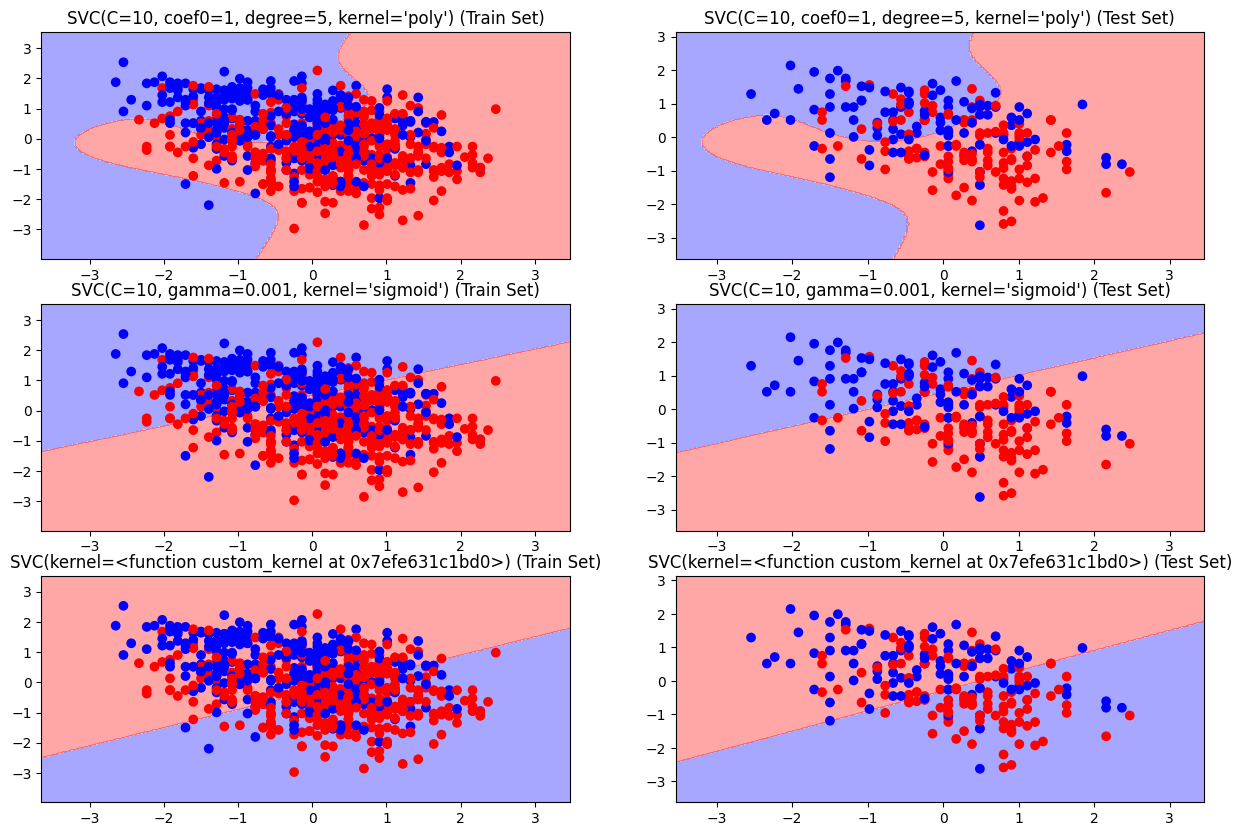

In [23]:
# Creates the list of classifiers
classifiers = [
    poly_grid.best_estimator_,
    sig_grid.best_estimator_,
    SVC(kernel=custom_kernel), 
]

# Sets the name of the Object for use in the graphs (not best practice)
poly_grid.best_estimator_.name = 'Polynomial Kernel'
sig_grid.best_estimator_.name = 'Sigmoid Kernel'
SVC.name = 'Custom Kernel'

# Plots the results on graphs
fig, axes = plt.subplots(len(classifiers), 2, figsize=(15, 10))

for i, classifier in enumerate(classifiers):
    train_ax = axes[i, 0]
    test_ax = axes[i, 1]
    clf = classifier.fit(X_train_scaled, train_y)
    plot_classifier(clf, train_ax, X_train_scaled, train_y)
    train_ax.set_title(f'{classifier} (Train Set)')
    plot_classifier(clf, test_ax, X_test_scaled, test_y)
    test_ax.set_title(f'{classifier} (Test Set)')

    # Calculates accuracy
    train_pred_y = clf.predict(X_train_scaled)
    test_pred_y = clf.predict(X_test_scaled)
    train_accuracy = (train_pred_y == train_y).sum() / X_train_scaled.shape[0]
    test_accuracy = (test_pred_y == test_y).sum() / X_test_scaled.shape[0]
    print(f"Train accuracy for {classifier}: {train_accuracy:.2%}")
    print(f"Train accuracy for {classifier}: {test_accuracy:.2%}\n")

As the model becomes more complex the chance of overfitting increases. Despite, using a 5th-degree polynomial kernel performs well, although not quite as well as the simple linear model. Test accuracy could hence be improve through futher analysis of the hyperparameters , for example by increasing the number of tested values (such as testing higher degree polynomials) or by testing values on different subsets of the dataset, for exmaple through cross-validation.  

The accuracy using the custom kernel is expectantly very low due to the transformation function being chosen arbritrarily. However, with research, more relevant values could be chosen.

#### 17. Repeat Training questions 5,6 and 8 outlined above (using Gradient Descent) using three soft margin classifiers. Compare and contrast the classification results you generate. Make suggestions for improvements of the soft margin classifiers. Comment on the tradeoff for bias and variance for each classifier.

Lastly I have attempted to classify the data using three soft margin classifiers:

*   SVC
*   LinearSVC
*   SGDClassifier

Soft margin classifiers are more robust to anomolies and outliers in the data as they do not impose that all datapoints in the training set must be in the correct 'zone' and the set distance away from the margin. Soft margin classifiers are less rigid as they allow for some margin violations (Geron, 2019). For example, if we have dataset that is linearly seperable for all but one outlier, the model may reduce the distance between the margin and the data in order to minimise the distance between the outlier and where it is supposedly meant to be. This may be helpful in our dataset as the data is not very seperable. 

SVC uses `libsvm` as its solver, whereas, LinearSVC uses `liblinear` and is generally considered the superior model due to SVC slow convergence time, especially with large datasets (Geron, 2019). We can, however, implement Stochastic Gradient Descent to train a SVM by using `SDGClassifier`, which can be helpful due to Stochastic Gradient Descent being more memory efficient as previously discussed, albeit not as fast (Geron, 2019). In this case our dataset is small so we may not see such benefits between classifiers. 

Soft margin classification can be implemented by setting a high C (for SVC and LinearSVC) or alpha value (in the case of SGDClassifier) as well as setting the loss function for LinearSVC and SGDClassifier to "hinge" (Geron, 2019). Alpha and C act as regularisation terms to determine how strongly the model values the training data. 

In [24]:
# Creates the list of classifiers
classifiers = [
    SVC(C=1),
    LinearSVC(C=1, loss='hinge', max_iter=10000),
    SGDClassifier(loss='hinge', alpha=0.1)
]

Train accuracy for SVC(C=1): 71.95%
Train accuracy for SVC(C=1): 68.26%

Train accuracy for LinearSVC(C=1, loss='hinge', max_iter=10000): 68.90%
Train accuracy for LinearSVC(C=1, loss='hinge', max_iter=10000): 67.83%

Train accuracy for SGDClassifier(alpha=0.1): 69.77%
Train accuracy for SGDClassifier(alpha=0.1): 67.39%



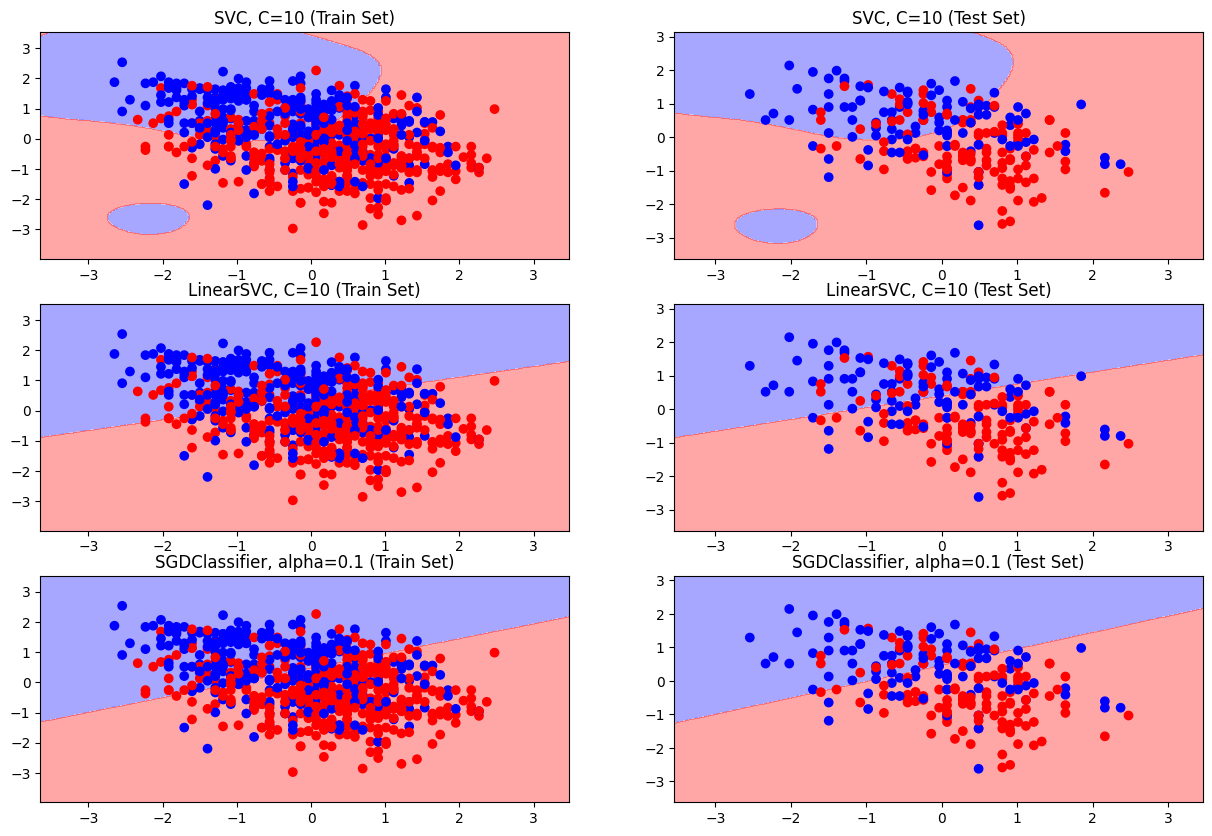

In [25]:
# Sets the name of the Object for use in the graphs.  
SVC.name = 'SVC, C=10'
LinearSVC.name = 'LinearSVC, C=10'
SGDClassifier.name = 'SGDClassifier, alpha=0.1'

# Plots the results on graphs
fig, axes = plt.subplots(len(classifiers), 2, figsize=(15, 10))

for i, classifier in enumerate(classifiers):
    train_ax = axes[i, 0]
    test_ax = axes[i, 1]
    classifier.fit(X_train_scaled, train_y)
    plot_classifier(classifier, train_ax, X_train_scaled, train_y)
    train_ax.set_title(f'{classifier.name} (Train Set)')
    plot_classifier(classifier, test_ax, X_test_scaled, test_y)
    test_ax.set_title(f'{classifier.name} (Test Set)')

    # Calculates accuracy
    train_pred_y = classifier.predict(X_train_scaled)
    test_pred_y = classifier.predict(X_test_scaled)
    train_accuracy = (train_pred_y == train_y).sum() / X_train_scaled.shape[0]
    test_accuracy = (test_pred_y == test_y).sum() / X_test_scaled.shape[0]
    print(f"Train accuracy for {classifier}: {train_accuracy:.2%}")
    print(f"Train accuracy for {classifier}: {test_accuracy:.2%}\n")

The models have similar accuracy, both to each other and previous models. However, we can definitely see a small improvement in accuracy when using a soft-margin classifier, likely due to the how distributed and close-together the data presents. 

The soft-margin classifier, as well as the overall model, with the highest train accuracy is SVC(C=1) with 71.95% classification accuracy. Yet, the models test accuracy drops significantly to 68.26%, despite being the overall best model. This model tends to have high variance and can overfit training data, resulting in a discrepancy between training and test accuracy. Further work to improve the model could be conducted by experimenting with the level of bias versus variance by tuning the gamma hyper-parameter. 

Unlike the subsequent soft-margin classifiers SVC uses `rbf` as its default kernel. However, more biased linear models that seem to perform better on the data up until this point so it may be worth experimenting further with different levels of regularisation. 

Overall, this report provides insight into the effects of different models at binary classification with a small dataset.

# Reference List:


Geron, A. (2019). 'Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow'. O'Reilley: California, USA. Available online: http://noiselab.ucsd.edu/ECE228/Murphy_Machine_Learning.pdf

Genesis, 2018. 'Artificial Neural Network Part 7', *Artificial Neural Network*. Available online: https://www.fromthegenesis.com/artificial-neural-network-part-7/

Murphy, K. P. (2022). 'Machine Learning: A Probabalistic Perspective'. The MIT Press: Massachusetts, USA. Available online: https://www.knowledgeisle.com/wp-content/uploads/2019/12/2-Aur%C3%A9lien-G%C3%A9ron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-O%E2%80%99Reilly-Media-2019.pdf

Sreenivasa, S. (2020). 'Radial Basis Function (RBF) Kernel: The Go-To Kernel'. *Towards Data Science*. Medium. Available online: https://towardsdatascience.com/radial-basis-function-rbf-kernel-the-go-to-kernel-acf0d22c798a#:~:text=RBF%20Kernel%20is%20popular%20because,and%20not%20the%20entire%20dataset.